<a href="https://colab.research.google.com/github/ekonine/ml_projects/blob/master/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Dog Breed Classification

## 1. Problem

Identifying a breed of a dog given an image of a dog.

## 2. Data

Assorted Images - From Kaggle (Dog Breed Identification)

## 3. Evaluation

Prediction probabilities for each dog breed per image.

## 4. Features

Some information about the data:
* Unstructured Dog Images
* 120 breeds of dogs
* 10,000+ images in both training (with labels) and test set (without labels)

# Workspace Setup

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Ensure GPU usage

In [1]:
# Import Required Libraries
import tensorflow as tf
import tensorflow_hub as hub

print("TF version", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version 2.3.0
TF Hub version: 0.9.0
GPU available


## Data Preparation

In [6]:
import pandas as pd

labels_csv = pd.read_csv("drive/My Drive/Data/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     83217877553b0d7ba501cf416e4b7b8e  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


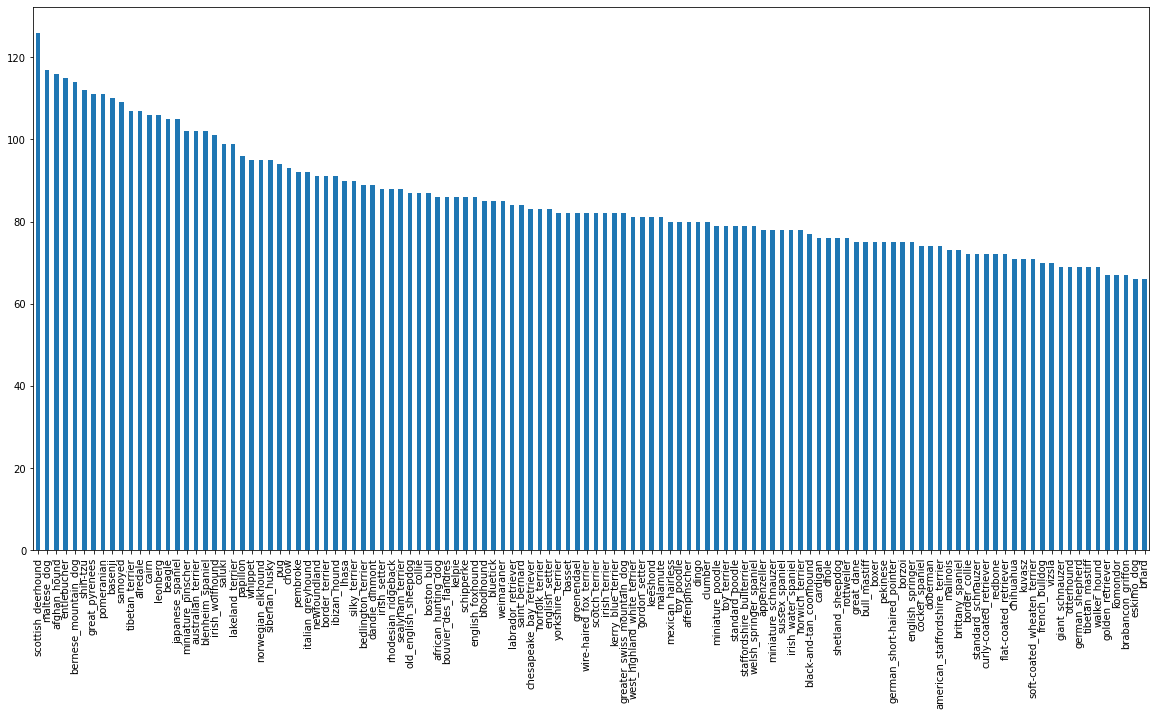

In [9]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [18]:
filenames = ["drive/My Drive/Data/train/" + fname + ".jpg" for fname in labels_csv['id']]
filenames[:5]

['drive/My Drive/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [17]:
import os
if len(os.listdir("drive/My Drive/Data/train/")) == len(filenames):
  print("Valid")
else:
  print("Not Valid")

Valid
